In [1]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


In [2]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']

dir = dirs[4]
total_df=pd.read_csv(f'../{dir}/clus_data/{dir}_total.csv')
def f(col1,col2):
    return col1/col2

# total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
# total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)

# total_df['total_income']=total_df['total_income']/1000000
# total_df['total_cost']=total_df['total_cost']/1000000
# total_df['total']=total_df.iloc[:,1:].sum(axis=1)


# total_df['total_income'] = np.log2(total_df['total_income'])
# total_df['total_cost'] = np.log2(total_df['total_cost'])


# total_df=total_df.iloc[:, [1, 3]]
total_df=total_df.iloc[:,1:]
total_df[total_df.isnull().any(axis=1)]
total_df_corr =total_df
total_df=total_df[['member','Male_count','Female_count','age','literacy','vehicle','motorcycle','facilities','total_cost','total_income']]

In [3]:
total_df.columns


Index(['member', 'Male_count', 'Female_count', 'age', 'literacy', 'vehicle',
       'motorcycle', 'facilities', 'total_cost', 'total_income'],
      dtype='object')

**Robust scaler**

In [4]:
from sklearn.preprocessing import RobustScaler

rbs_data_scaled = RobustScaler(with_centering = True, with_scaling = True).fit_transform(total_df)



**elbow rbs**

within cluster sum of squared distance for k=2:  193449.5981062464
within cluster sum of squared distance for k=3:  167607.3419720267
within cluster sum of squared distance for k=4:  128063.56691110146
within cluster sum of squared distance for k=5:  116797.84114711362
within cluster sum of squared distance for k=6:  108285.44943987326
within cluster sum of squared distance for k=7:  89765.05731256669
within cluster sum of squared distance for k=8:  81560.67902531072
within cluster sum of squared distance for k=9:  76841.60077399589
within cluster sum of squared distance for k=10:  73520.89813800166
within cluster sum of squared distance for k=11:  68301.25611660266
within cluster sum of squared distance for k=12:  65800.70249607835
within cluster sum of squared distance for k=13:  63525.33793519318
within cluster sum of squared distance for k=14:  61087.19425779871
within cluster sum of squared distance for k=15:  59203.08033283948
within cluster sum of squared distance for k=16:  575

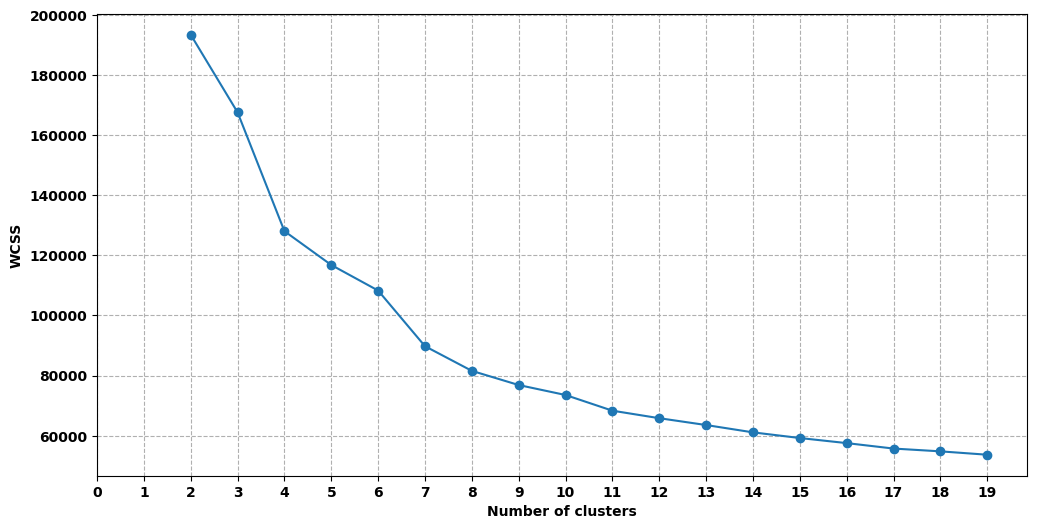

In [5]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(rbs_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette rbs**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


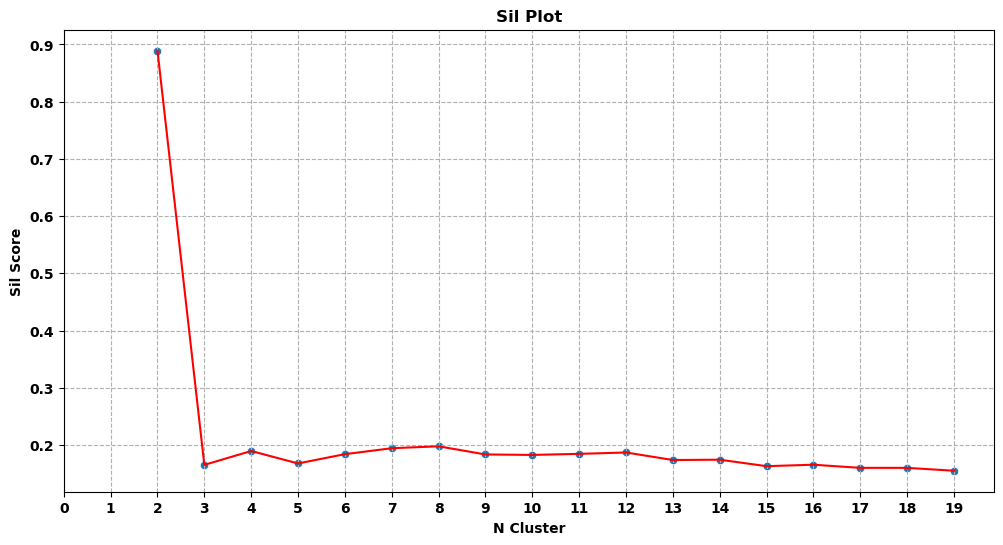

In [6]:
from sklearn.metrics import silhouette_score
df =rbs_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**PCA rbs**

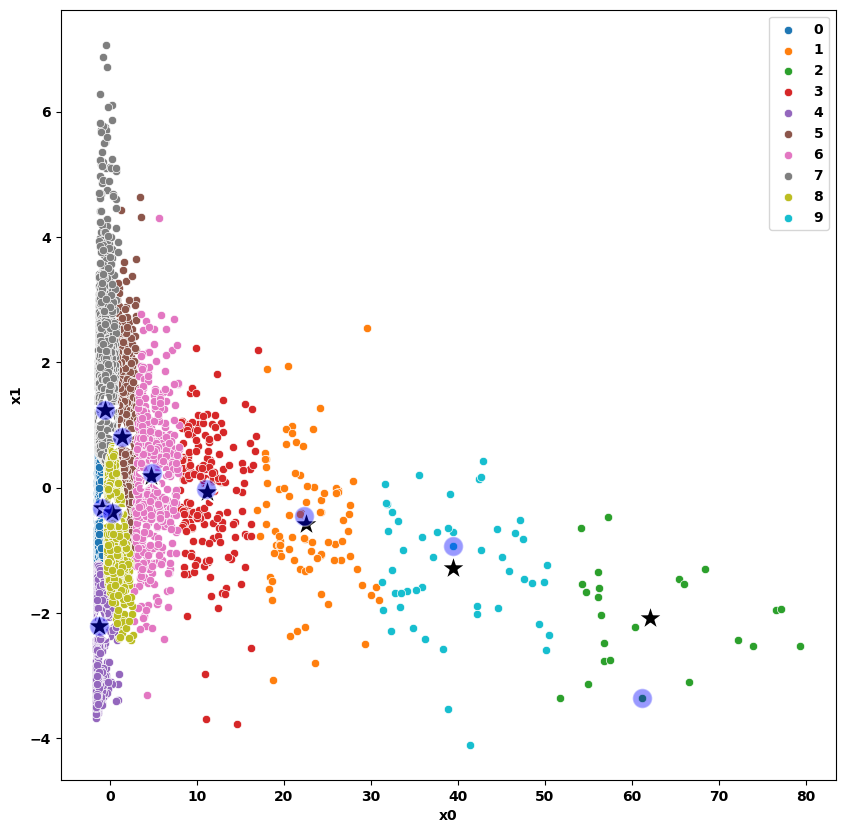

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(rbs_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**L2 norm**

In [8]:
l2_data_scaled = preprocessing.normalize(total_df, norm='l2')
l2_data_scaled = pd.DataFrame(l2_data_scaled, columns = total_df.columns)

**elbow l2**

within cluster sum of squared distance for k=2:  800.6555266607527
within cluster sum of squared distance for k=3:  362.93932520052124
within cluster sum of squared distance for k=4:  212.98650014841198
within cluster sum of squared distance for k=5:  144.83946865081467
within cluster sum of squared distance for k=6:  106.41999495459942
within cluster sum of squared distance for k=7:  82.2737071951147
within cluster sum of squared distance for k=8:  66.38059027259615
within cluster sum of squared distance for k=9:  54.206654341046125
within cluster sum of squared distance for k=10:  46.72763080772555
within cluster sum of squared distance for k=11:  36.27415235673695
within cluster sum of squared distance for k=12:  30.10332076568991
within cluster sum of squared distance for k=13:  25.917556437116822
within cluster sum of squared distance for k=14:  22.541100382201346
within cluster sum of squared distance for k=15:  19.340401586928216
within cluster sum of squared distance for k=16: 

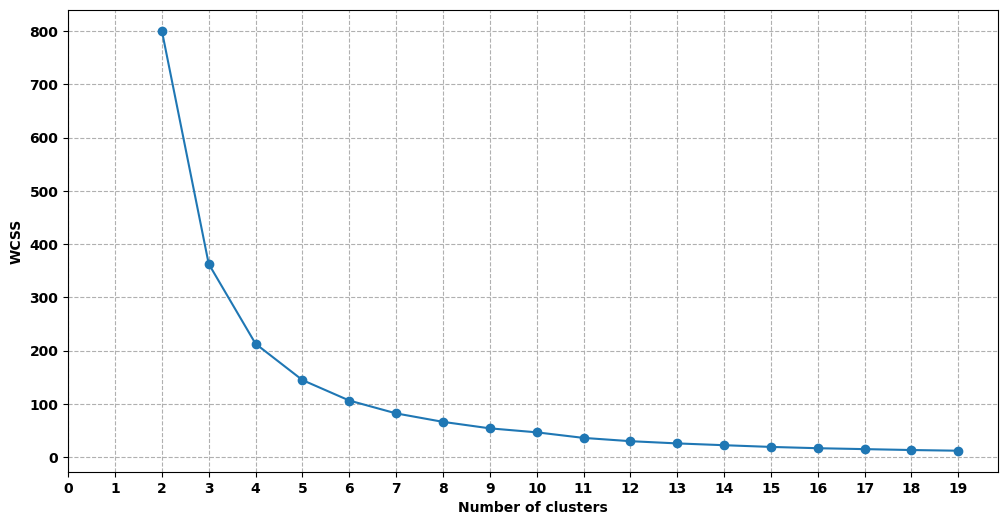

In [9]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(l2_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette l2**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


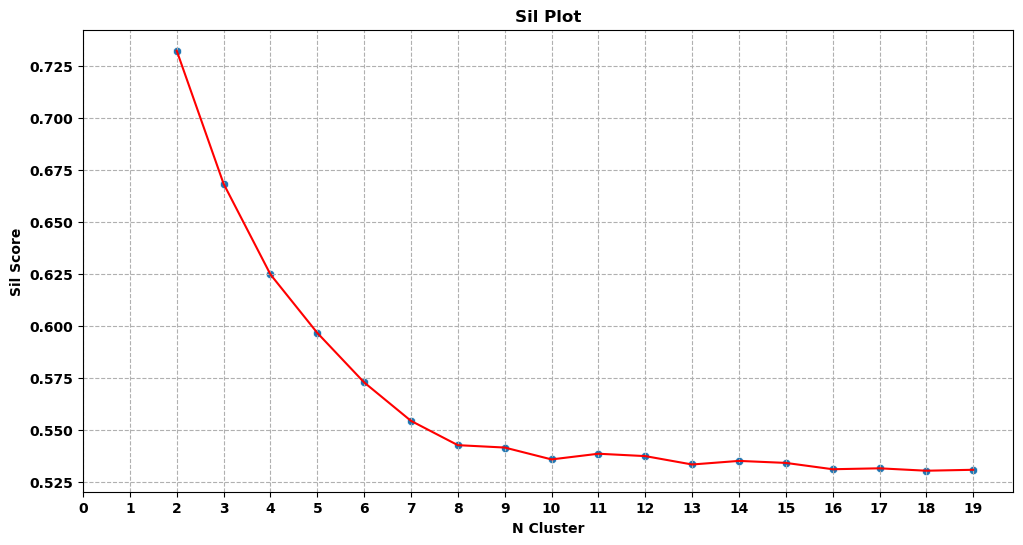

In [10]:
from sklearn.metrics import silhouette_score
df =l2_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

<p dir=rtl style="direction: rtl;text-align justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
این جا براساس شکستگی sil و elbow  و در رسم نمودار بعدی از آن استفاده می کنیم مقادیر 5 یا 6 مناسب است که ما مقدار 6 رو انتخاب میکنیم
</p>

**Pca l2**

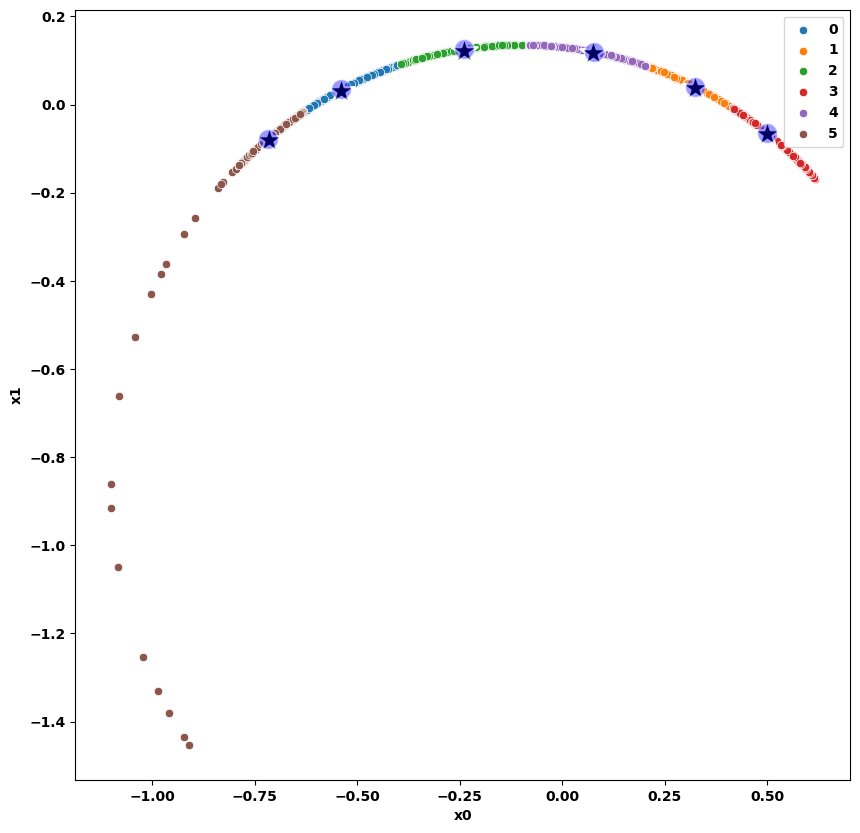

In [11]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(l2_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center l2**

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_17564\870627896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([10988, 11361, 16469, 14527, 16848,  8865], dtype=int64)

C:\Users\theki\AppData\Local\Temp\ipykernel_17564\4228730169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


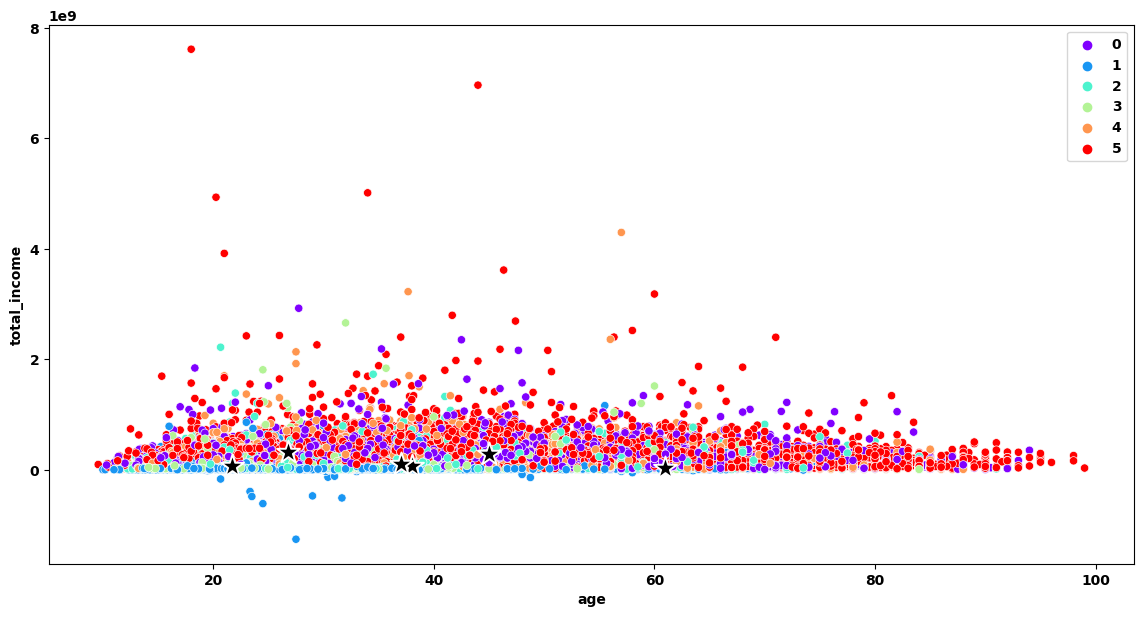

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 visualize**

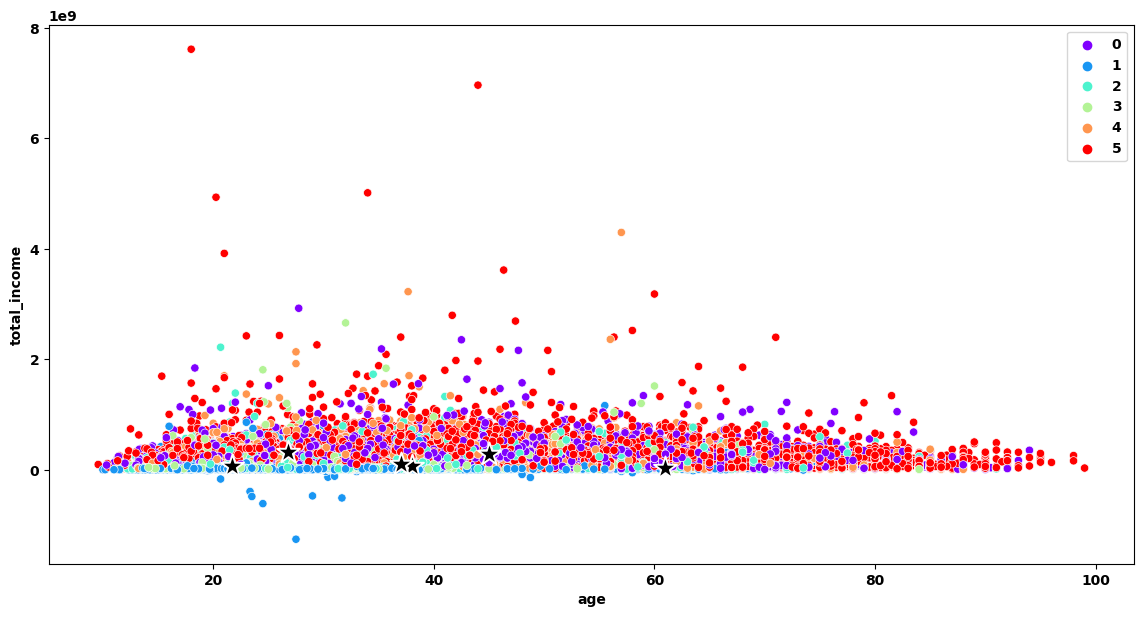

In [14]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 points**

In [15]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
18080,4,2,2,26.750000,0.500000,1,0,9,844882000.0,314480000.0,3
17374,3,1,2,45.000000,1.000000,1,0,8,190312000.0,290000000.0,4
14020,1,0,1,37.000000,1.000000,0,0,3,17124638.0,105460000.0,5
17505,3,1,2,21.666667,0.666667,0,0,9,26471000.0,72920000.0,0
16391,3,2,1,38.000000,0.666667,1,0,6,87639100.0,71760000.0,2
19227,2,1,1,61.000000,0.000000,0,1,7,303028000.0,32420000.0,1


**MaxAbs scaler**

In [16]:
scaler = MaxAbsScaler()
data_scaled =scaler.fit_transform(total_df)
data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)


**min_max scaler**

In [17]:
minmax_scaler = MinMaxScaler()
minmax_data_scaled =minmax_scaler.fit_transform(total_df)
minmax_data_scaled = pd.DataFrame(minmax_data_scaled, columns = total_df.columns)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
به نظر میاد احتمالا min_max scaler va MaxAbsScaler بهتر میتونه نقاط شکستگی نمودار elbow و Silhoeute رو نمایش بده
</p>

**elbow min_max**

within cluster sum of squared distance for k=2:  9252.29920472817
within cluster sum of squared distance for k=3:  7855.117149582693
within cluster sum of squared distance for k=4:  6019.328109186999
within cluster sum of squared distance for k=5:  5068.513391333614
within cluster sum of squared distance for k=6:  4161.167505254181
within cluster sum of squared distance for k=7:  3957.0323822866976
within cluster sum of squared distance for k=8:  3192.9842549108266
within cluster sum of squared distance for k=9:  3075.383673967493
within cluster sum of squared distance for k=10:  2959.575060640812
within cluster sum of squared distance for k=11:  2756.8923319677247
within cluster sum of squared distance for k=12:  2602.519677388674
within cluster sum of squared distance for k=13:  2471.673590554171
within cluster sum of squared distance for k=14:  2331.0526917709126
within cluster sum of squared distance for k=15:  2297.1802228908095
within cluster sum of squared distance for k=16:  22

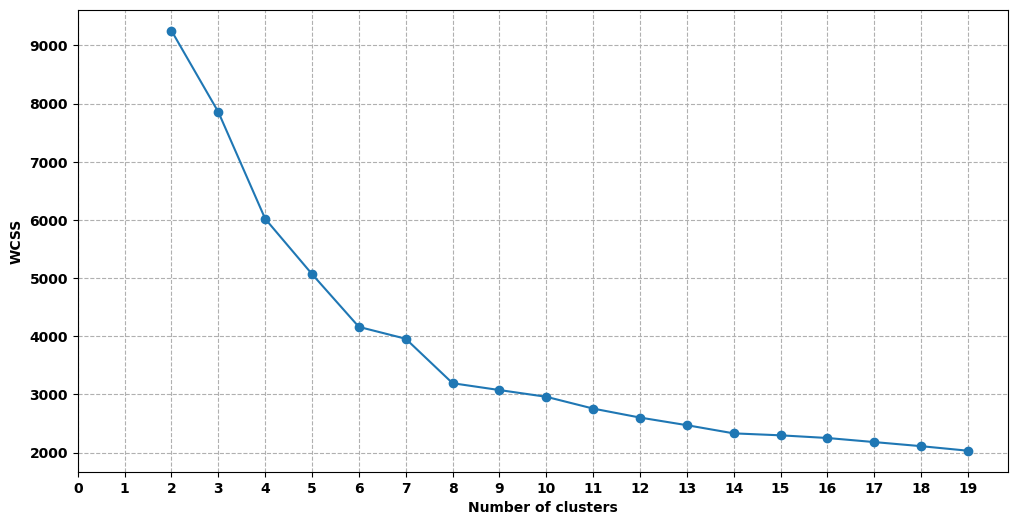

In [18]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(minmax_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette min_max**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


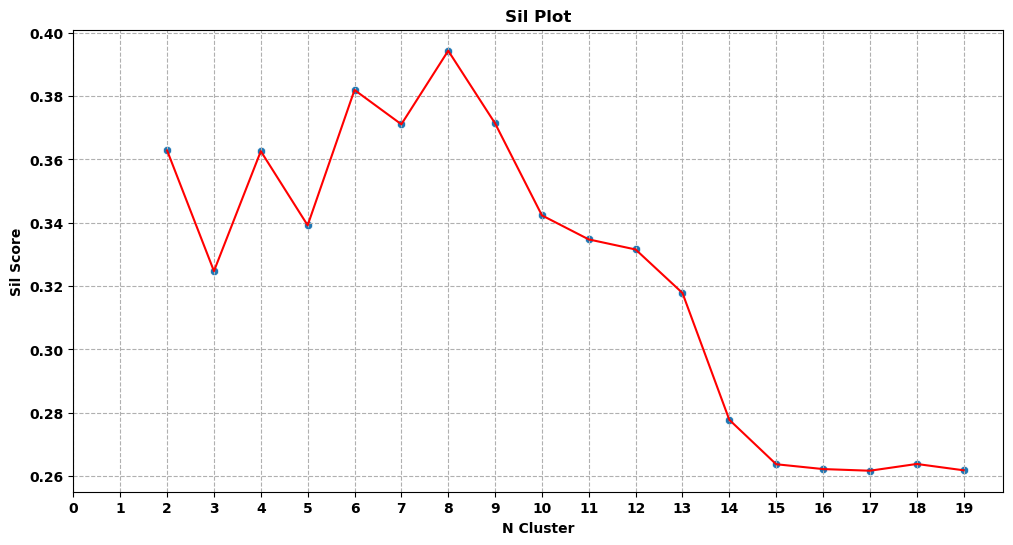

In [19]:
from sklearn.metrics import silhouette_score
df =minmax_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Pca min_max**

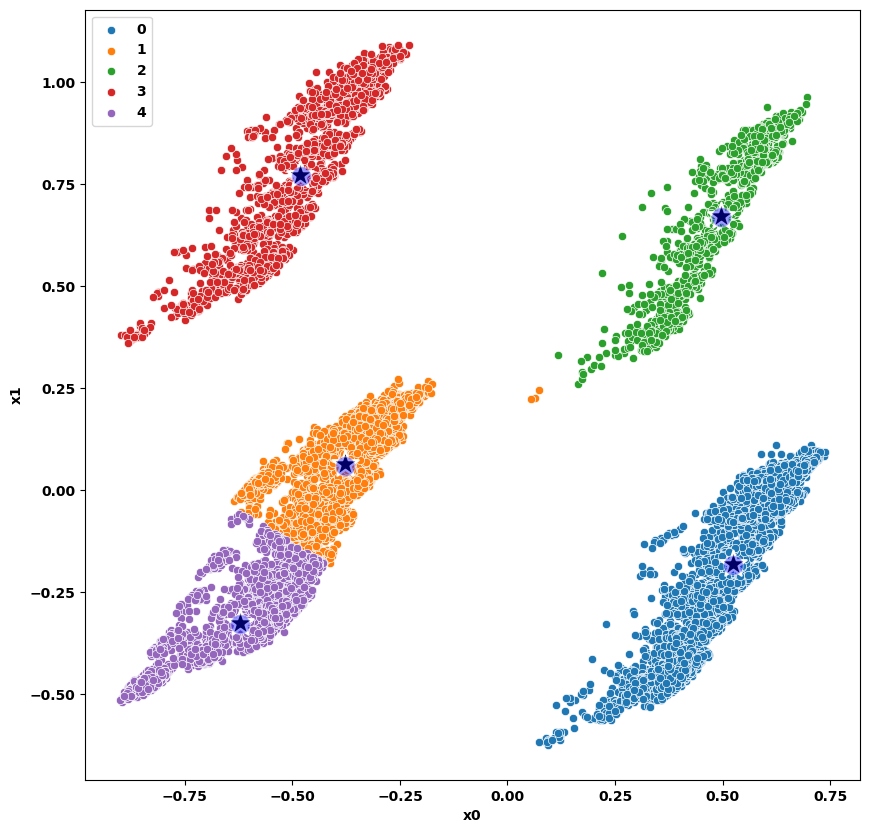

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(minmax_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**standard scaler**

In [21]:
z_scaler = StandardScaler()
z_data_scaled =z_scaler.fit_transform(total_df)
z_data_scaled = pd.DataFrame(z_data_scaled, columns = total_df.columns)


**elbow standard scaler**

within cluster sum of squared distance for k=2:  181468.8634562906
within cluster sum of squared distance for k=3:  163410.92802530344
within cluster sum of squared distance for k=4:  150752.3448117348
within cluster sum of squared distance for k=5:  142228.59122951757
within cluster sum of squared distance for k=6:  130916.5477120052
within cluster sum of squared distance for k=7:  118310.07572853878
within cluster sum of squared distance for k=8:  120287.74059911969
within cluster sum of squared distance for k=9:  108151.59300514785
within cluster sum of squared distance for k=10:  113478.8691934942
within cluster sum of squared distance for k=11:  101083.29717107306
within cluster sum of squared distance for k=12:  98957.41500562664
within cluster sum of squared distance for k=13:  95368.86347743977
within cluster sum of squared distance for k=14:  93229.50658736812
within cluster sum of squared distance for k=15:  90950.05313176567
within cluster sum of squared distance for k=16:  

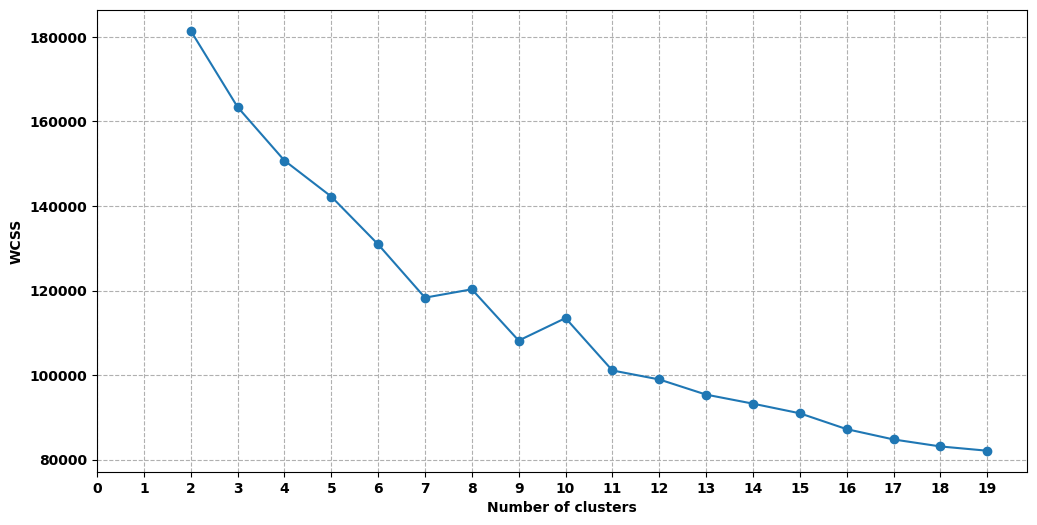

In [22]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(z_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

k=6 ro mishe ye noghte shekast darnazar gereft ama vaghean moshakhas nist kheily
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Silhouette standard scaler**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


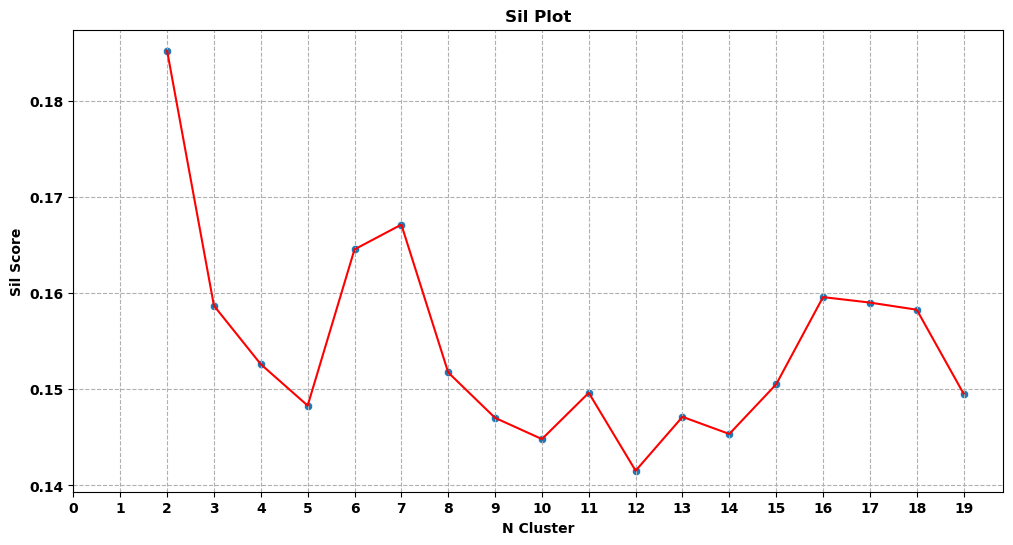

In [23]:
from sklearn.metrics import silhouette_score
df =z_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

mibinim ke natije Sil plot jaleb nist
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Pca standard scaler**

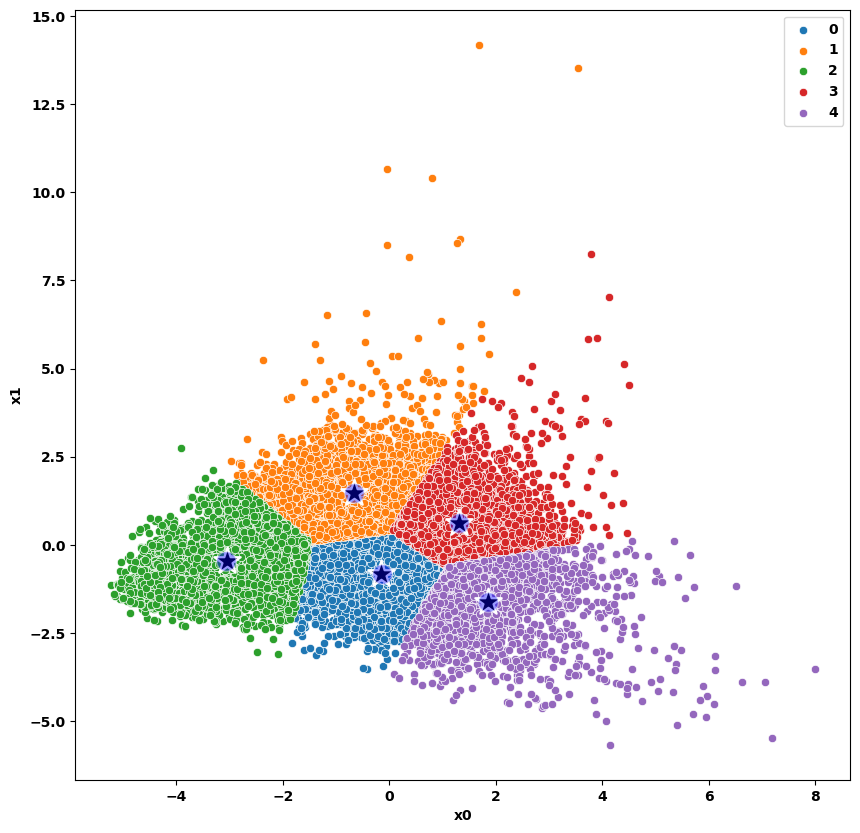

In [24]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(z_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center standard scaler visualization**

C:\Users\theki\AppData\Local\Temp\ipykernel_17564\224913684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


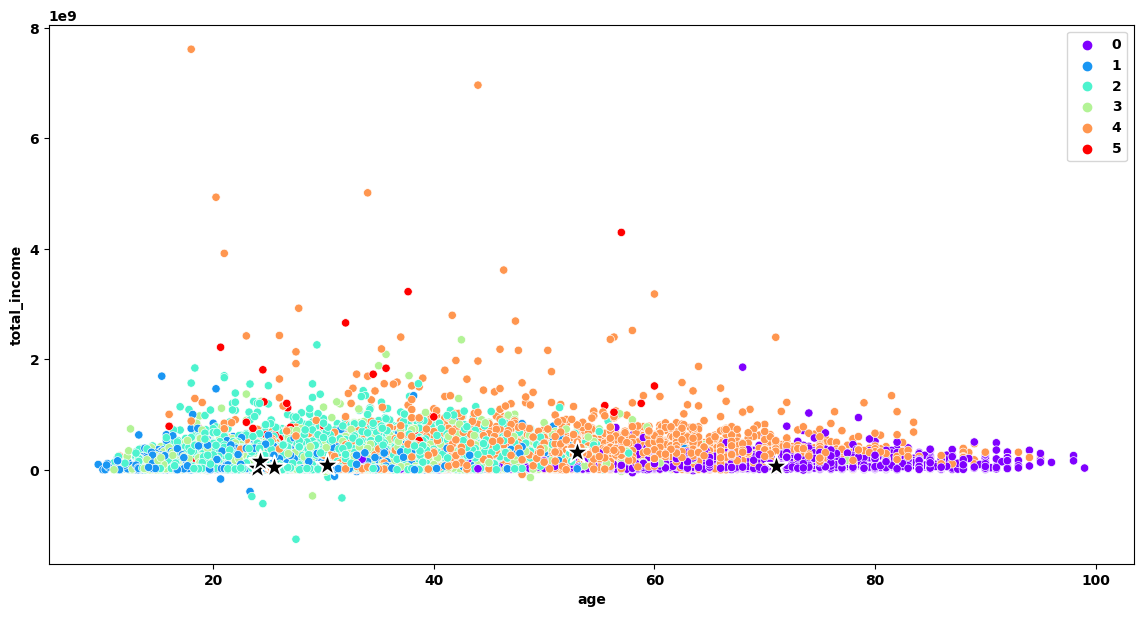

In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(z_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, z_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center standard scaler points**

In [26]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
3526,2,1,1,53.000000,1.00,0,0,7,1.929492e+08,323780000.0,4
16492,4,2,2,24.250000,1.00,1,0,7,1.619585e+08,163840000.0,2
13553,3,1,2,30.333333,1.00,1,0,6,4.615191e+09,89760000.0,5
2588,2,1,1,71.000000,0.00,0,0,5,1.331190e+08,58920000.0,0
3529,4,2,2,25.500000,0.75,0,1,7,4.726200e+07,46340000.0,3
11811,4,2,2,24.000000,0.75,0,0,6,1.287639e+08,36870000.0,1



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
از نمودار و این خوشه ها نتیجه به این شکل نشون داده میشه
</p>

In [27]:
# data_scaled=total_df

<Axes: >

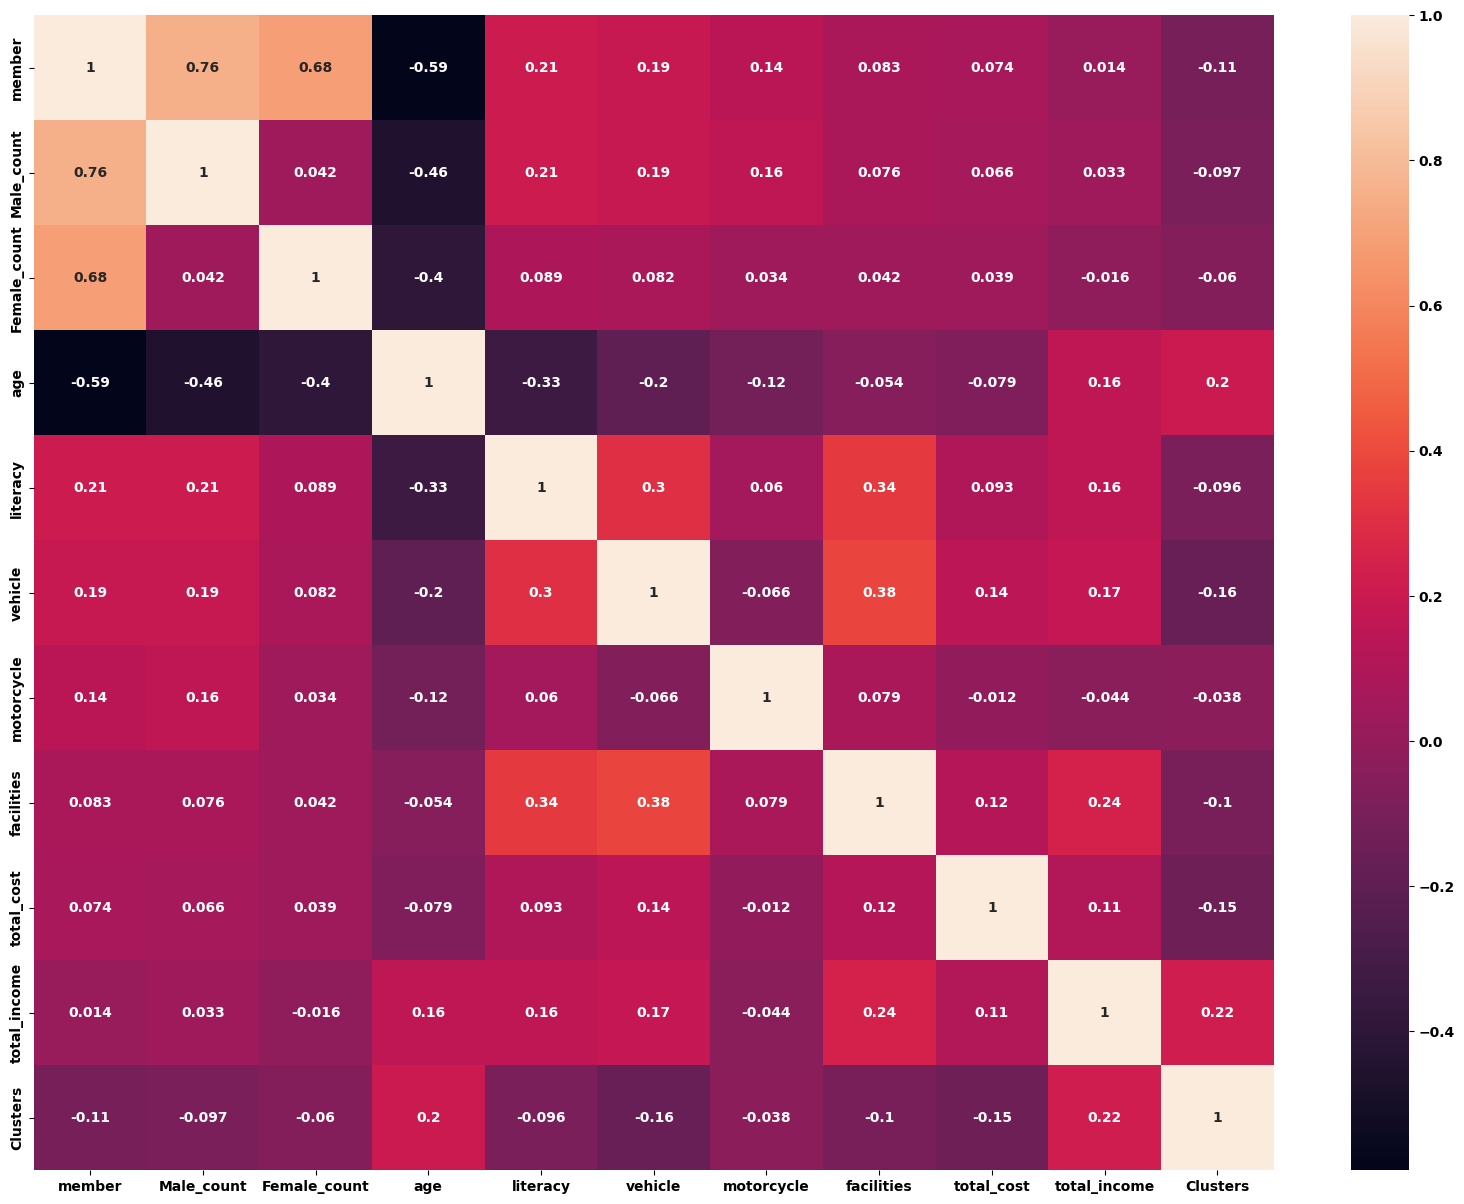

In [28]:
corr = pd.DataFrame(data_scaled).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر سن افراد خانواده بیشتر باشه هزینه هاشون کمتر میشه
</p>

**min_max scaler**

<Axes: >

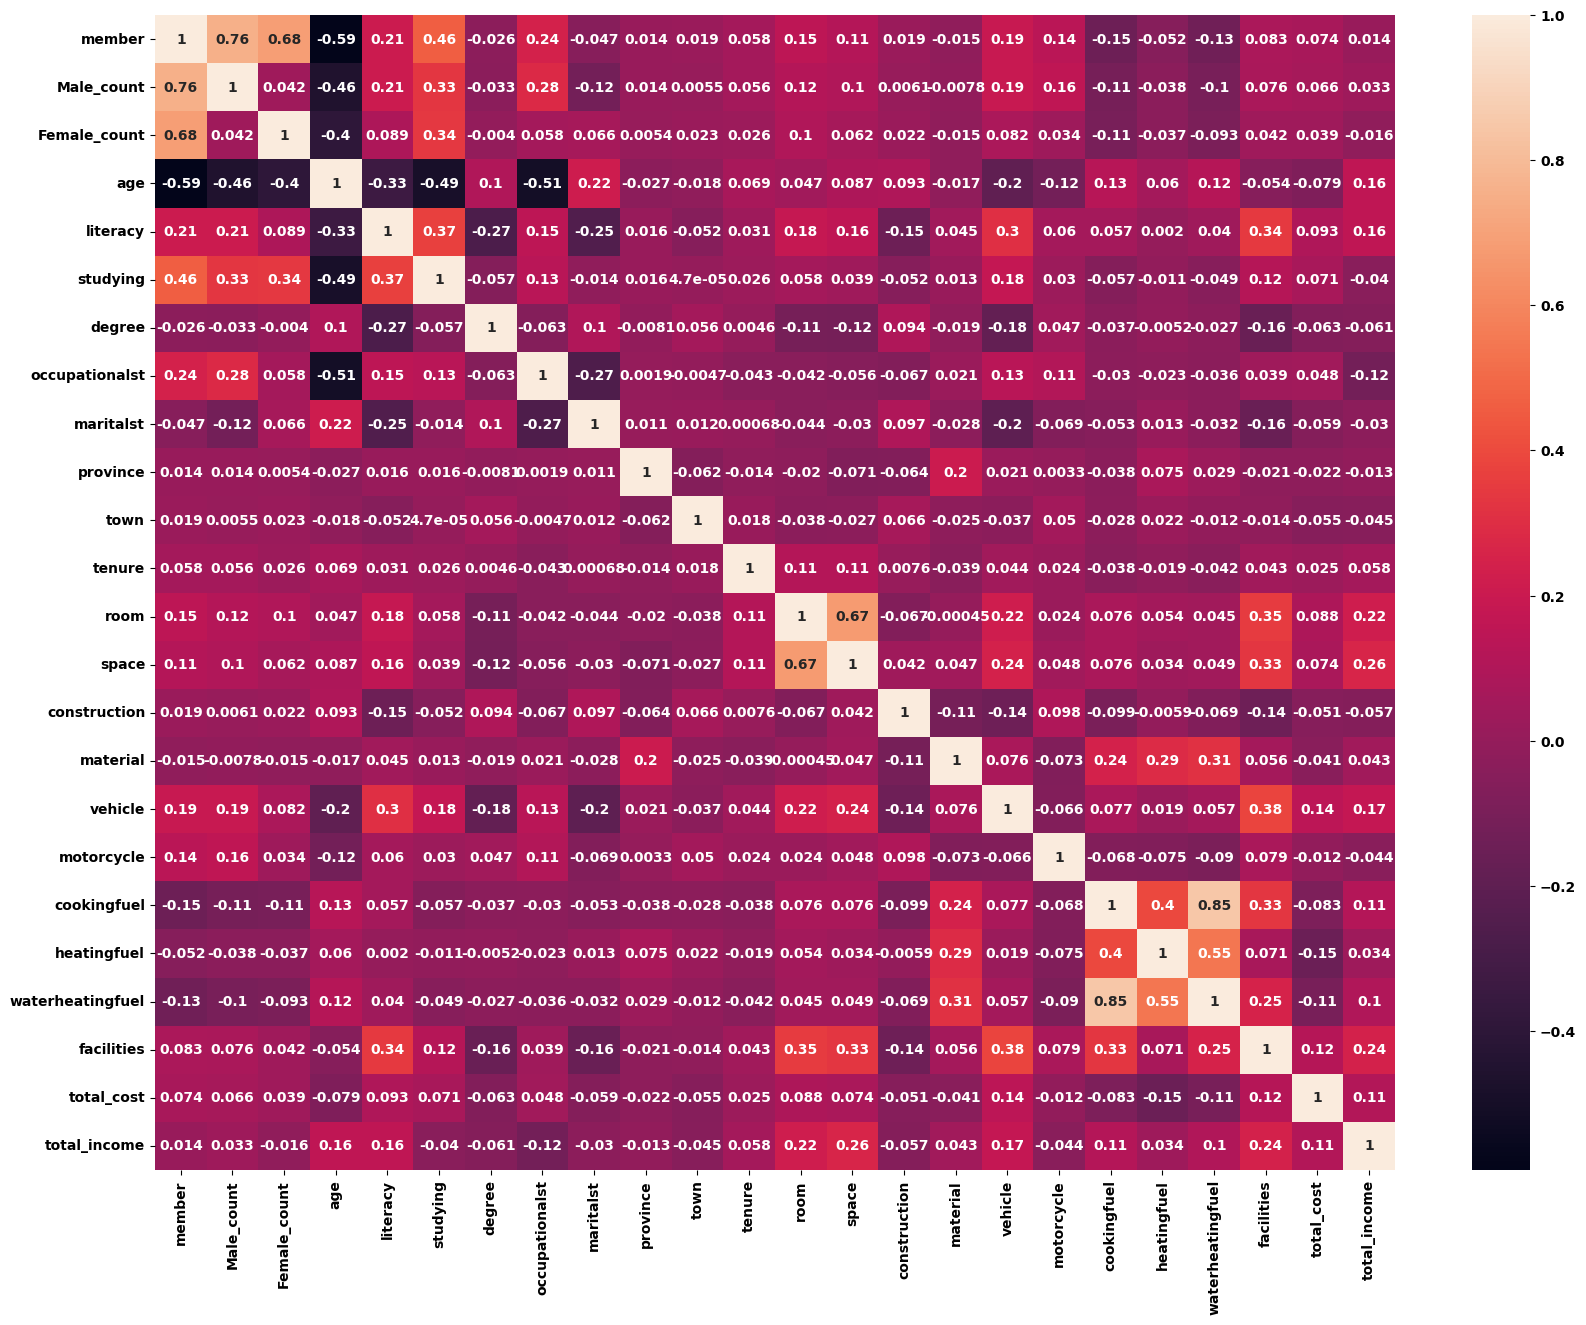

In [29]:
corr = pd.DataFrame(total_df_corr).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
سواد داشتن با میزان ازدواج رابطه عکس داره 0.28 منفی یعنی هر چقدر سواد بره بالا میزان ازدواج تو خانواده کمتر میشه
</p>



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر female_count  یک خانواده بیشتر باشه تعداد اتاق های منزل هم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر وسیله نقلیه یه خونواده بیشتر باشه هزینه هاشم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر دانش آموز بیشتری داشته باشه یه خانواده امکانات منزلش هم باید بیشتر باشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر سن بالاتر بره تو خانواده تعداد اعضای اون خانواده کمتر میشه
</p>

**Clustering after PCA**

In [30]:

# pca = PCA(2)


# df = pca.fit_transform(data_scaled)


# from sklearn.cluster import KMeans

# gmm = GaussianMixture(n_components=5)
# gmm.fit(df)
# # kmeans = KMeans(n_clusters= 6,init="k-means++")

# # label = kmeans.fit_predict(df)
# label = gmm.predict(df)

# u_labels = np.unique(label)

# # closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

# plt.subplots(figsize=(10,10))
# for i in u_labels:
#     sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
# # sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
# # sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

# plt.xlabel('x0')
# plt.ylabel('x1')
# plt.legend()
# plt.show()

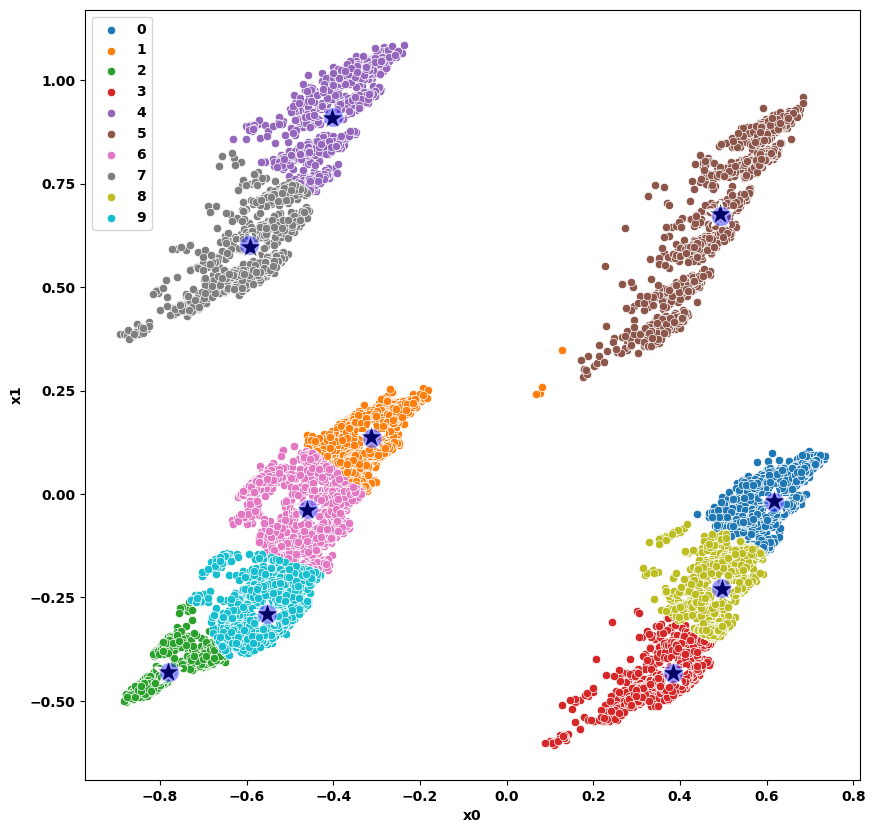

In [31]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**decision boundary visualization**

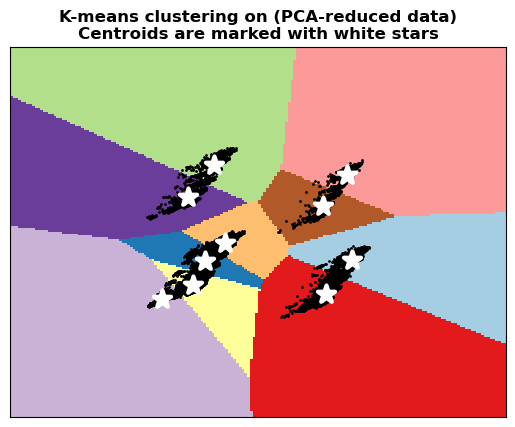

In [32]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on (PCA-reduced data)\n'
          'Centroids are marked with white stars')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
 

In [33]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_17564\3833494303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 4471, 12150, 17928,  1878,  8053,  4254, 11960, 14746,  8239,
       10105], dtype=int64)

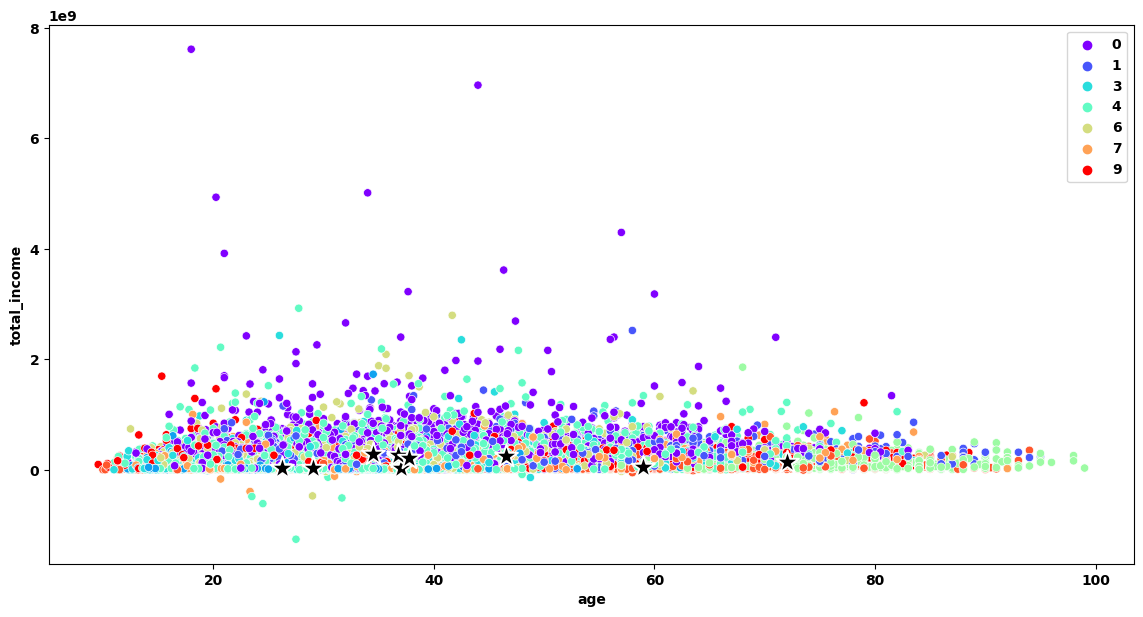

In [35]:

col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**noghate namayesh dahande marakez har cluster**

In [36]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
11960,4,2,2,34.50,1.00,1,1,8,280144500.0,279840000.0,6
14746,4,2,2,36.75,1.00,0,0,6,114772300.0,261840000.0,7
12150,2,1,1,46.50,1.00,0,0,6,41975500.0,250420000.0,1
4471,4,2,2,36.75,1.00,1,0,7,180552300.0,237840000.0,0
10105,4,2,2,37.75,0.50,0,0,6,40438500.0,217340000.0,9
4254,2,1,1,72.00,0.00,0,0,5,22581000.0,138220000.0,5
8239,2,1,1,59.00,0.00,0,0,5,18891800.0,40920000.0,8
1878,4,2,2,37.00,0.75,0,1,7,75027181.0,28580000.0,3
17928,4,2,2,26.25,0.75,0,0,6,77271000.0,21840000.0,2
8053,4,2,2,29.00,0.75,1,0,7,270885000.0,21840000.0,4


**be khanevar haye 1 nafari tavajoh konid ke aghlab hodode 70 sal sen darand**

**WCSS: It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

within cluster sum of squared distance for k=2:  9089.986506737998
within cluster sum of squared distance for k=3:  7375.487388131834
within cluster sum of squared distance for k=4:  6271.908830788567
within cluster sum of squared distance for k=5:  5133.801656797194
within cluster sum of squared distance for k=6:  4509.50493867133
within cluster sum of squared distance for k=7:  3382.3437355471347
within cluster sum of squared distance for k=8:  3239.6606736719186
within cluster sum of squared distance for k=9:  3146.5729199404473
within cluster sum of squared distance for k=10:  2837.4580188665414
within cluster sum of squared distance for k=11:  2773.281040802387
within cluster sum of squared distance for k=12:  2663.0900149471186
within cluster sum of squared distance for k=13:  2535.1095414016477
within cluster sum of squared distance for k=14:  2459.305706728911
within cluster sum of squared distance for k=15:  2425.320379070626
within cluster sum of squared distance for k=16:  2

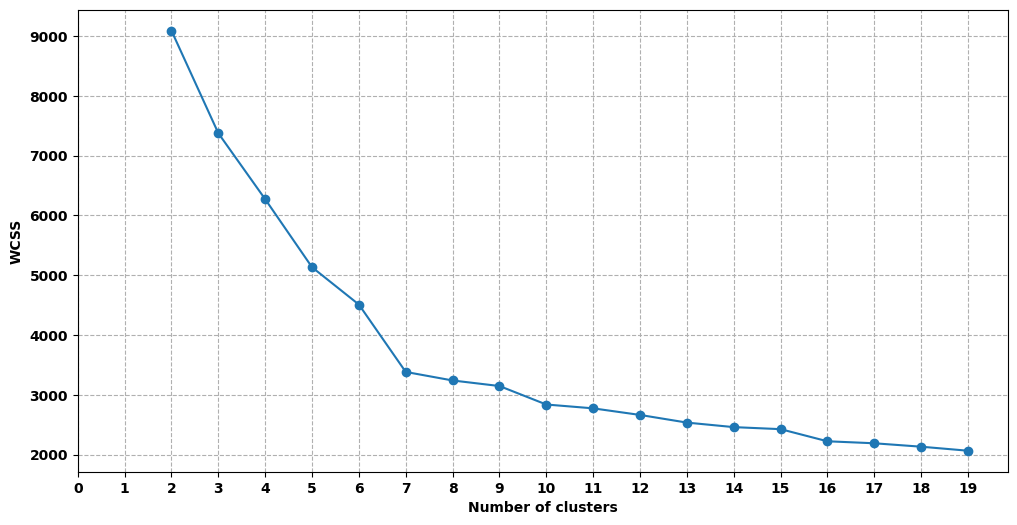

In [37]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette: The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


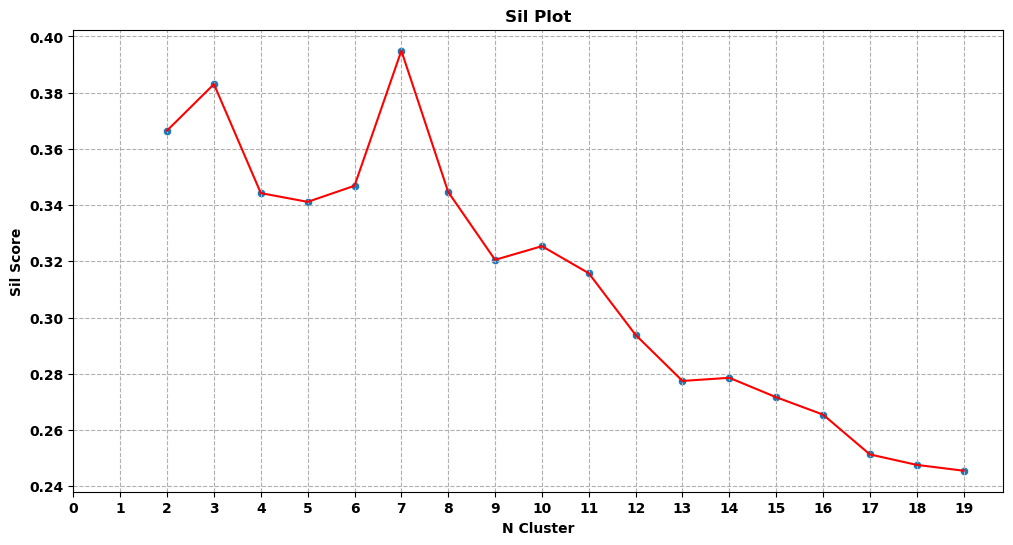

In [38]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Silhouette Visualizer**

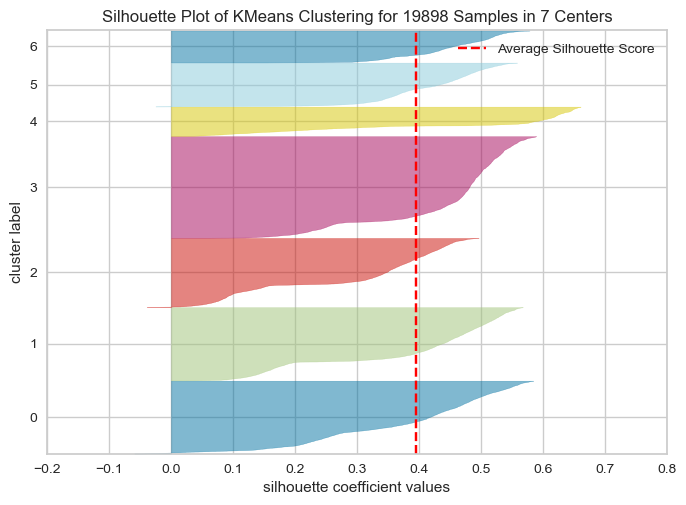

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 19898 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(7,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
در این نمایش از Sil درواقع خط چین قرمز میانگین Sil میباشد که اولا هر چه این مقدار به 1 نزدیک تر باشد خوشه های بهتری داریم ثانیا سایزخوشه ها هم باید تقریبا یکسان باشد مثلا در مثال بالا اگر k=6 میشد مقدار sil  به کمتر از 0.5 کاهش میافت و سایز خوشه ها کوچک و بزرگ میشد بنابراین بهترین مقدار برای k همین 7 است.
</p>

**Decision Boundary**

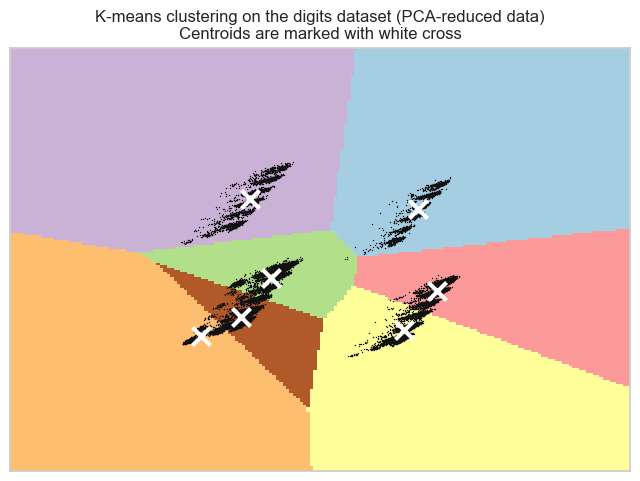

In [58]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [69]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=7,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_17564\2426635073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 4471,  1878, 15328, 11309, 15851,  8053, 11960], dtype=int64)

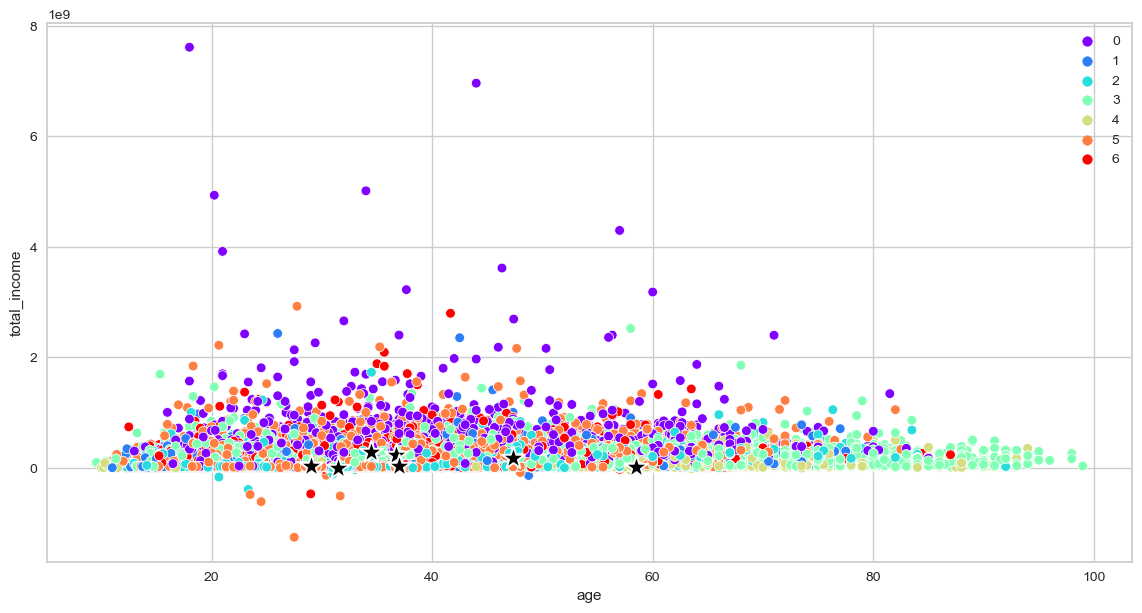

In [70]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [71]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
11960,4,2,2,34.500000,1.000000,1,1,8,280144500.0,279840000.0,6
4471,4,2,2,36.750000,1.000000,1,0,7,180552300.0,237840000.0,0
11309,3,1,2,47.333333,0.666667,0,0,6,31774000.0,172380000.0,3
1878,4,2,2,37.000000,0.750000,0,1,7,75027181.0,28580000.0,1
8053,4,2,2,29.000000,0.750000,1,0,7,270885000.0,21840000.0,5
15851,2,1,1,58.500000,0.000000,0,0,5,134990000.0,10920000.0,4
15328,4,2,2,31.500000,0.750000,0,0,6,92405000.0,0.0,2


<b><p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
تلاش هایی برای نمایش بهتر شکست در دونمودار Sil و elbow  برای یافتن بهترین مقدار k
</p></b>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
pca اگر اسکیل داده ها نامناسب باشد کمک خاصی به بهتر شدن نمودار elbow ,Silhouette نمی کند
</p>

In [75]:
total_df.groupby('Clusters').size()

Clusters
0    3458
1    2082
2    3065
3    4117
4     879
5    4789
6    1508
dtype: int64

**pca for finding k**

In [44]:
pca = PCA(5)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

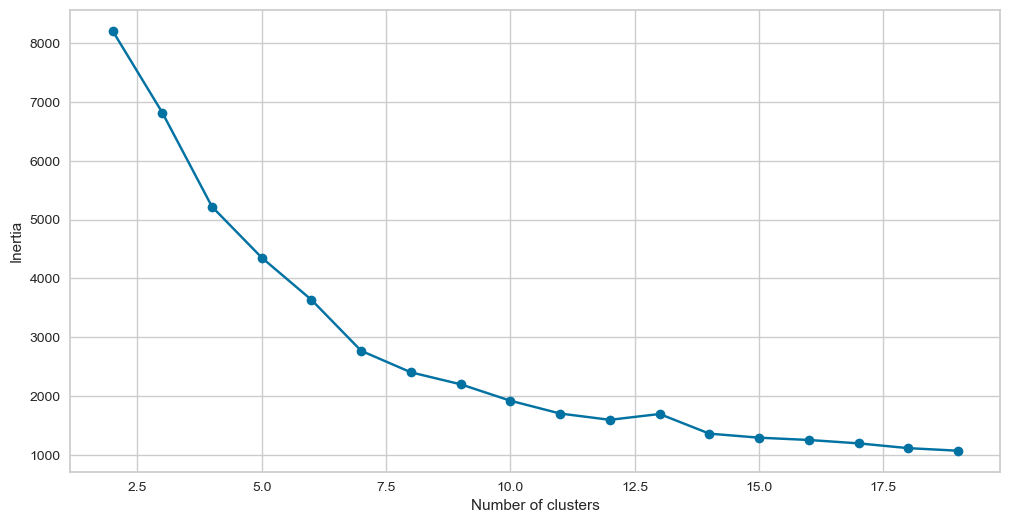

In [45]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


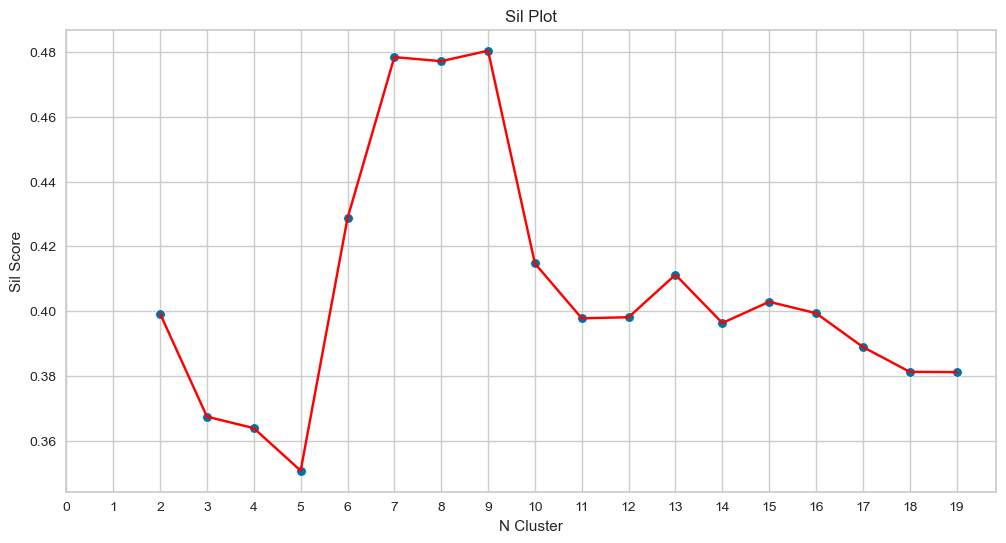

In [46]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

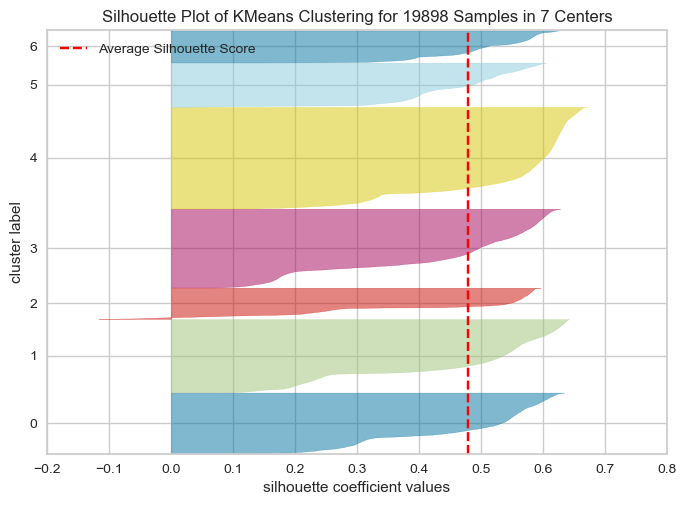

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 19898 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(7,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [85]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=7,init="k-means++",random_state=42).fit(df)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_17564\2585552819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 8156,  6133,  1005,  1809,  4916, 14043, 18803], dtype=int64)

In [86]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
6133,5,1,4,42.80,0.80,1,0,10,409172500.0,749144000.0,1
1809,4,2,2,36.00,0.75,0,0,10,151634430.0,246380000.0,3
18803,4,3,1,37.50,1.00,1,1,5,214025700.0,237440000.0,6
1005,2,1,1,70.00,0.00,0,0,6,493699500.0,226980000.0,2
4916,5,4,1,40.80,0.80,1,0,10,134549940.0,30000000.0,4
14043,4,1,3,34.00,0.75,0,1,8,73830000.0,21840000.0,5
8156,4,2,2,33.75,0.75,0,0,8,143056000.0,16610000.0,0


In [87]:
total_df.loc[total_df.Clusters == 5, ].age.mean()

32.70576330756446

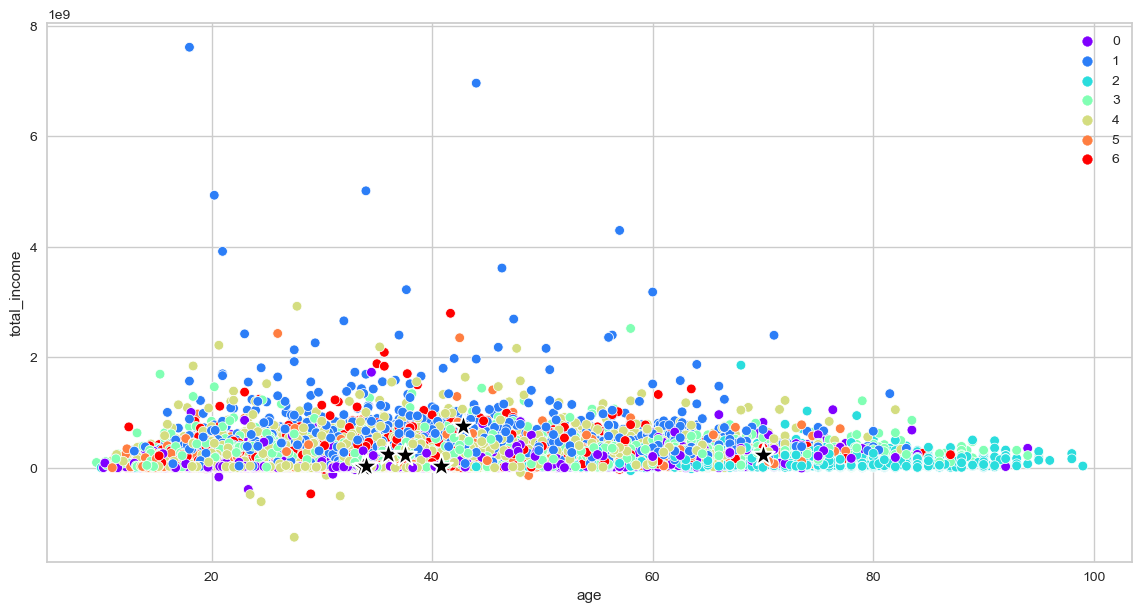

In [89]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()